# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle
from sklearn.metrics import mean_absolute_error
from prettytable import PrettyTable
from astropy.table import Table, Column

# Load Sample Data

In [4]:
df=pd.read_csv('Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


#  Understand and Pre-process Sample Data

## Understand Sample Data

In [5]:
df.shape

(10000, 4)

In [6]:
##check missing values
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [7]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


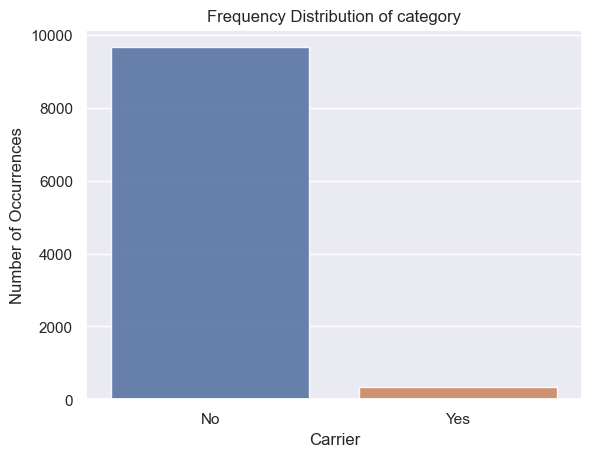

In [8]:
%matplotlib inline
carrier_count = df["default"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of category')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

## Pre-process Sample Data

In [9]:
final_dataset=df.drop(['student'],axis=1)
final_dataset.head()

,default,balance,income
0,No,729.526495,44361.62507
1,No,817.180407,12106.13470
2,No,1073.549164,31767.13895
3,No,529.250605,35704.49394
4,No,785.655883,38463.49588


### Shifting the Depedant variable at the last column

In [10]:
final_dataset=final_dataset[['income','balance','default']]
final_dataset.head()

,income,balance,default
0,44361.62507,729.526495,No
1,12106.13470,817.180407,No
2,31767.13895,1073.549164,No
3,35704.49394,529.250605,No
4,38463.49588,785.655883,No


# Label Encoding the Sample Data (Output is converted in Numeric Representation)

In [11]:
from sklearn.preprocessing import LabelEncoder 
default = pd.DataFrame({"default":["No","Yes"]}) 
default_label_encoder = LabelEncoder() 
default_label_encoder.fit(np.ravel(default))  

LabelEncoder()

In [12]:
final_dataset_encoded= final_dataset.copy()
final_dataset_original= final_dataset.copy()

In [13]:
 final_dataset["encoded_default"] = default_label_encoder.transform(final_dataset['default']) 
#print(final_dataset[["default", "encoded_default"]])

##  Saving and printing encoded data

In [14]:
final_dataset_encoded[['default']] = final_dataset[['encoded_default']] 
pd.set_option("display.max_rows", None, "display.max_columns", None) 
print("\n\nSample Data after Label Encoding of Output:") 
print("===========================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None) 
final_dataset_encoded.head()



Sample Data after Label Encoding of Output:



,income,balance,default
0,44361.62507,729.526495,0
1,12106.13470,817.180407,0
2,31767.13895,1073.549164,0
3,35704.49394,529.250605,0
4,38463.49588,785.655883,0


In [15]:
dataset=final_dataset_encoded.copy()

## Random Seed

In [16]:
RANDOM_SEED=10

# a& b) Fitting Logistic Regression Model Using Validation Set Appraoch

## i) Splitting Sample Data into Training Data and Testing Data 80-20%,75-25,70-30

In [17]:
training_data, testing_data = train_test_split( dataset, test_size=0.2 , random_state=RANDOM_SEED , shuffle = False)
training_data1, testing_data1 = train_test_split( dataset, test_size=0.25 , random_state=RANDOM_SEED , shuffle = False)
training_data2, testing_data2 = train_test_split( dataset, test_size=0.30 , random_state=RANDOM_SEED , shuffle = False)


## Splitting Input Vectors and Outputs / Labels of Training Data

In [18]:
input_vector_train = training_data[['income','balance']]
output_label_train = training_data[['default']]
input_vector_train1 = training_data1[['income','balance']]
output_label_train1 = training_data1[['default']]
input_vector_train2 = training_data2[['income','balance']]
output_label_train2 = training_data2[['default']]


## Splitting Input Vectors and Outputs / Labels of Testing Data

In [19]:
input_vector_test = testing_data[['income','balance']]
output_label_test = testing_data[['default']]
input_vector_test1 = testing_data1[['income','balance']]
output_label_test1 = testing_data1[['default']]
input_vector_test2 = testing_data2[['income','balance']]
output_label_test2 = testing_data2[['default']]

## ii) Fitting multiple logistic regression models using only the training observations

### Logistic Rergression on 80-20

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=RANDOM_SEED)
LR.fit(input_vector_train,np.ravel(output_label_train))

LogisticRegression(random_state=10)

### Logistic Rergression on 75-25

In [21]:
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression(random_state=RANDOM_SEED)
LR1.fit(input_vector_train1,np.ravel(output_label_train1))

LogisticRegression(random_state=10)

### Logistic Rergression on 70-30

In [22]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression(random_state=RANDOM_SEED)
LR2.fit(input_vector_train2,np.ravel(output_label_train2))

LogisticRegression(random_state=10)

## Making Predictions
### iii) Make Predictions with the Trained Models on validating Data aer (80-20) split

In [23]:
LR_Predictions =LR.predict(input_vector_test)
testing_data.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data["LogisticsPredictions"] = np.round(LR_Predictions,2)

LR_Predictions= testing_data
LR_Predictions.head()
#print(LR_Predictions)

,income,balance,default,LogisticsPredictions
8000,23866.93586,304.146598,0,0
8001,40686.76015,353.631131,0,0
8002,39010.14819,1269.420335,0,0
8003,22710.86574,397.542488,0,0
8004,49547.46582,607.166271,0,0


## Confusion Matrix

<AxesSubplot:>

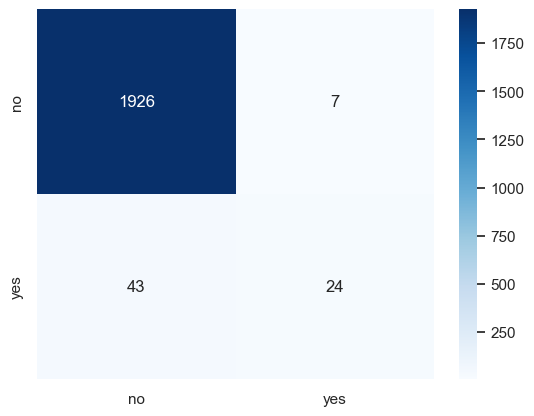

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
matrix =confusion_matrix(LR_Predictions["default"],LR_Predictions["LogisticsPredictions"])
df_cm = pd.DataFrame(matrix, columns=['no','yes'], index=['no','yes'])
sns.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')

## Classification Report

In [25]:
print(classification_report(LR_Predictions["default"],LR_Predictions["LogisticsPredictions"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.77      0.36      0.49        67

    accuracy                           0.97      2000
   macro avg       0.88      0.68      0.74      2000
weighted avg       0.97      0.97      0.97      2000



## iV) Calculating the Mean Absolute Error

In [26]:
lr_model_error = mean_absolute_error(LR_Predictions["default"],LR_Predictions["LogisticsPredictions"])

print("\n\nMean Absolute Error :")
print("=======================\n")
LRError=lr_model_error
print(LRError)




Mean Absolute Error :

0.025


## C) Repeating process in b

### Make Predictions with the Trained Models on Validation Data 75-25

In [27]:
LR_Predictions1 =LR1.predict(input_vector_test1)
testing_data1.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data1["LogisticsPredictions"] = np.round(LR_Predictions1,2)

LR_Predictions1= testing_data1
LR_Predictions1.head()
#print(LR_Predictions1)

,income,balance,default,LogisticsPredictions
7500,33760.51826,796.257261,0,0
7501,36596.12674,506.462321,0,0
7502,48121.18102,160.012404,0,0
7503,49109.36138,339.691181,0,0
7504,35288.33508,0.000000,0,0


## Confusion Matrix

<AxesSubplot:>

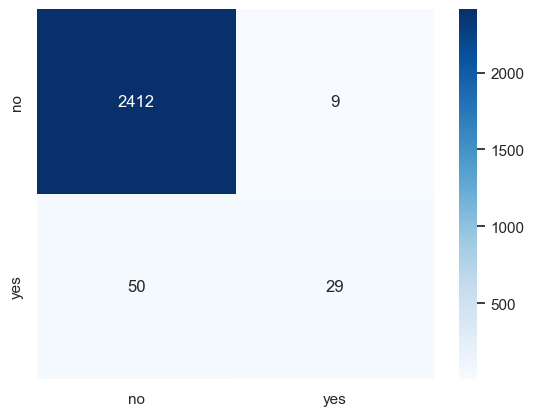

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
matrix1 =confusion_matrix(LR_Predictions1["default"],LR_Predictions1["LogisticsPredictions"])
df_cm = pd.DataFrame(matrix1, columns=['no','yes'], index=['no','yes'])
sns.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')

## Classification Report

In [29]:
print(classification_report(LR_Predictions1["default"],LR_Predictions1["LogisticsPredictions"]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2421
           1       0.76      0.37      0.50        79

    accuracy                           0.98      2500
   macro avg       0.87      0.68      0.74      2500
weighted avg       0.97      0.98      0.97      2500



## Calculate the Mean Absolute Error

In [30]:
lr_model_error1 = mean_absolute_error(LR_Predictions1["default"],LR_Predictions1["LogisticsPredictions"])

print("\n\nMean Absolute Error :")
print("=======================\n")
LRError1=(lr_model_error1)
print(LRError1)




Mean Absolute Error :

0.0236


### Make Predictions with the Trained Models on validation Data 70-30

In [31]:
LR_Predictions2 =LR2.predict(input_vector_test2)
testing_data2.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data2["LogisticsPredictions"] = np.round(LR_Predictions2,2)

LR_Predictions2= testing_data2
LR_Predictions2.head()
#print(LR_Predictions2)

,income,balance,default,LogisticsPredictions
7000,30513.517930,351.820396,0,0
7001,23775.435570,265.503923,0,0
7002,6467.149663,1886.550570,0,0
7003,38218.184470,57.647049,0,0
7004,57377.432780,933.827036,0,0


## Confusion Matrix

<AxesSubplot:>

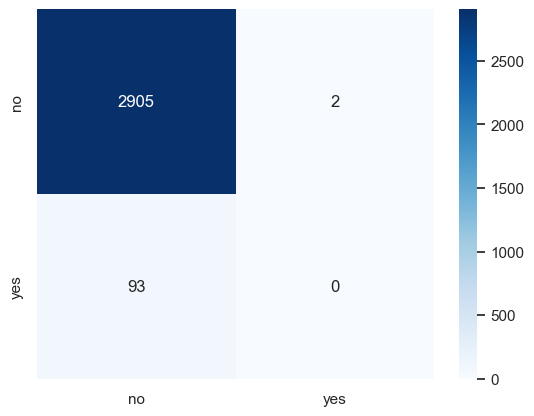

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
matrix2 =confusion_matrix(LR_Predictions2["default"],LR_Predictions2["LogisticsPredictions"])
df_cm = pd.DataFrame(matrix2, columns=['no','yes'], index=['no','yes'])
sns.heatmap(df_cm, annot=True,cmap='Blues',fmt='g')

## Classification Report

In [33]:
print(classification_report(LR_Predictions2["default"],LR_Predictions2["LogisticsPredictions"]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2907
           1       0.00      0.00      0.00        93

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000



## Calculate the Mean Absolute Error

In [34]:
lr_model_error2 = mean_absolute_error(LR_Predictions2["default"],LR_Predictions2["LogisticsPredictions"])

print("\n\nMean Absolute Error :")
print("=======================\n")
LRError2=(lr_model_error2)
print(LRError2)




Mean Absolute Error :

0.03166666666666667


# Results Obtained in the form of error

In [35]:
Models = pd.DataFrame({
    'Models': ['MAE_80-20','MAE_75-25','MAE_70-30'],
    
    'Mean Absolute Errors': np.round([lr_model_error,lr_model_error1,lr_model_error2],3)
                     })
print('Rank  ')
Models.sort_values(by=['Mean Absolute Errors'])

Rank  


,Models,Mean Absolute Errors
1,MAE_75-25,0.024
0,MAE_80-20,0.025
2,MAE_70-30,0.032


## From above table it is clear that when we split our sample data into training set and validation set in ratio of 75-25 % respectively, we acheive the least mean absolute error of 0.024 and accuracy of 98%  . While when spilt our sample data into 80-20 % and 70-30 % we got absolute mean error of 0.025 and 0.032 respectively with accuracies of 97% in both casses. This means that the best approach for splitting sample data into training and validation sets is to split it into ratio of 75-25 % to acheive accurate results with less error.